# 3강. 신경망
* https://github.com/WegraLee/deep-learning-from-scratch/tree/master/ch03

### 2강 퍼셉트론
 * 좋은 소식: 퍼셉트론으로 복잡한 함수도 표현 가능
 * 나쁜 소식: 가중치를 수작업으로 해야 함
 * 신경망이 나쁜 소식을 해결 해 줌
 > 신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 있음
 
### 3강 : 퍼셉트론의 한계를 극복해주는 신경망의 개념을 설명하고, 입력데이터의 정체를 식별하는 신경망을 구현해본다. 

    3.1 퍼셉트론에서 신경망으로
    3.2 활성화 함수
    3.3 다차원 배열의 계산
    3.4 3층 신경망 구현하기
    3.5 출력층 설계하기
    3.6 손글씨 숫자 인식
    3.7 정리

퍼셉트론은 여러 개의 입력값에 가중치를 곱해서 더하고, 거기에 상수 값을 추가한다. 이 값은 활성 함수에 따라 다시 결과 값으로 변환되는데 퍼셉트론의 경우에는 계산 값이 임계값보다 크면 1, 작으면 0을 결과값으로 출력한다.


In [35]:
from IPython.display import display
from ipywidgets import widgets, HBox

imageA = widgets.Image(value=open('img/1_3_1.png', 'rb').read(), width=300,height=200)
imageB =  widgets.Image(value=open('img/1_3_2.png', 'rb').read(),width=300,height=200)
imageC =  widgets.Image(value=open('img/1_3_3.png', 'rb').read(),width=400,height=200)

hbox = HBox([imageA, imageB,imageC])
display(hbox)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


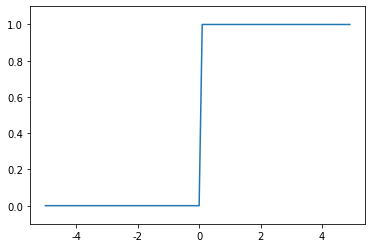

In [5]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

In [36]:
imageD = widgets.Image(value=open('img/1_3_4.png', 'rb').read(), width=600,height=1000)
imageE =  widgets.Image(value=open('img/1_3_5.png', 'rb').read(),width=800,height=1200)

hbox = HBox([imageD, imageE])
display(hbox)

비용 함수 (cost function)의 값이 최소가 되는 지점을 찾는 과정에서 활성화 함수는 미분되어야 한다. 그러나 계단 함수는 x = 0 에서 연속이 아니므로 미분 불가능하다. 각 노드의 활성화 함수로 계단 함수 대신 시그모이드 (sigmoid) 함수가 사용될 수 있다.

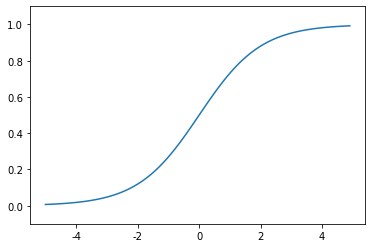

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

In [8]:
x1 = 0.2
x2 = 0.1

w1 = 2
w2 = 3
b = -1

a = w1*x1 + w2*x2 +b

In [9]:
sigmoid(a)

0.4255574831883411

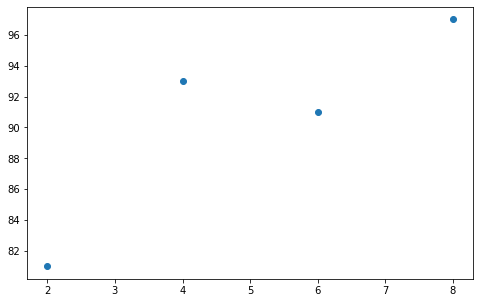

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]


#그래프로 나타내 봅니다.
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.show()

In [11]:
#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸어 줍니다.(인덱스를 주어 하나씩 불러와 계산이 가능해 지도록 하기 위함입니다.)
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값을 초기화 합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.03 

#몇 번 반복될지를 설정합니다.
epochs = 2001 

#경사 하강법을 시작합니다.
for i in range(epochs): # epoch 수 만큼 반복
    y_hat = a * x_data + b  #y를 구하는 식을 세웁니다
    error = y_data - y_hat  #오차를 구하는 식입니다.

    a_diff = -(2/len(x_data)) * sum(x_data * (error)) # 오차함수를 a로 미분한 값입니다. 
    b_diff = -(2/len(x_data)) * sum(error)  # 오차함수를 b로 미분한 값입니다. 
    a = a - lr * a_diff  # 학습률을 곱해 기존의 a값을 업데이트합니다.
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b값을 업데이트합니다.
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


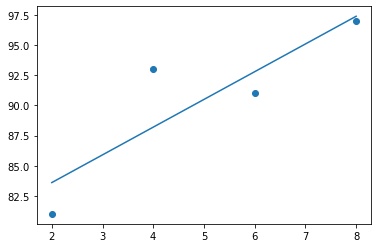

In [12]:
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

(-0.1, 1.1)

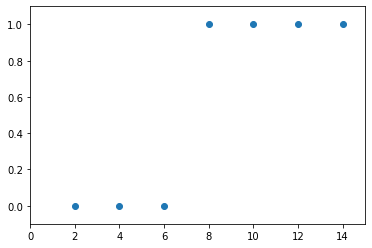

In [13]:
#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

#그래프로 나타내 봅니다.
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [14]:
# 기울기 a와 절편 b의 값을 초기화 합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.05


def step_function(x):
    return np.array(x > 0, dtype=np.int)

epochs = 2001 

#경사 하강법을 실행합니다.
for i in range(epochs):
    for x_data, y_data in data:
        a_diff = x_data*(step_function(a*x_data + b) - y_data) 
        b_diff = step_function(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=0.0000, 절편=0.0000
epoch=0, 기울기=0.0000, 절편=0.0000
epoch=0, 기울기=0.0000, 절편=0.0000
epoch=0, 기울기=0.4000, 절편=0.0500
epoch=0, 기울기=0.4000, 절편=0.0500
epoch=0, 기울기=0.4000, 절편=0.0500
epoch=0, 기울기=0.4000, 절편=0.0500
epoch=1000, 기울기=0.1000, 절편=-0.6500
epoch=1000, 기울기=0.1000, 절편=-0.6500
epoch=1000, 기울기=0.1000, 절편=-0.6500
epoch=1000, 기울기=0.1000, 절편=-0.6500
epoch=1000, 기울기=0.1000, 절편=-0.6500
epoch=1000, 기울기=0.1000, 절편=-0.6500
epoch=1000, 기울기=0.1000, 절편=-0.6500
epoch=2000, 기울기=0.1000, 절편=-0.6500
epoch=2000, 기울기=0.1000, 절편=-0.6500
epoch=2000, 기울기=0.1000, 절편=-0.6500
epoch=2000, 기울기=0.1000, 절편=-0.6500
epoch=2000, 기울기=0.1000, 절편=-0.6500
epoch=2000, 기울기=0.1000, 절편=-0.6500
epoch=2000, 기울기=0.1000, 절편=-0.6500


In [15]:
# 기울기 a와 절편 b의 값을 초기화 합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.05 

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

epochs = 2001 

#경사 하강법을 실행합니다.
for i in range(epochs):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a*x_data + b) - y_data) 
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


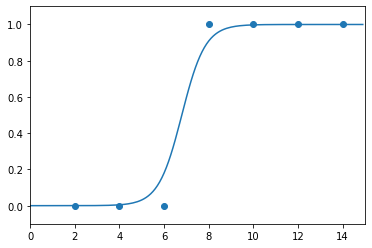

In [16]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위를 정합니다.
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

시그모이드 함수의 특성

* X = 0에서 값이 연속된다
* 입력 신호의 총합을 0에서 1사이의 값으로 바꿔준다.
* 입력 신호의 값이 커질수록(작아질수록) 뉴런의 활성화률(firing rate)이 ​(작아질 경우 ​)로 수렴(saturation)한다.

하지만, 위와 같은 특성 때문에 시그모이드 함수는 2가지 문제가 있다.

* 입력의 절대값이 크게 되면 0이나 1로 수렴하게 되는데, 이러한 뉴런들은 그래디언트를 소멸(kill) 시켜 버린다. 그 이유는 수렴된 뉴런의 그래디언트 값은 0이기 때문에 역전파에서 0이 곱해지기 때문이다. 따라서, 역전파가 진행됨에 따라 아래 층(layer)에는 아무것도 전달되지 않는다.(시그모이드의 도함수는 ​이므로 함수의 값이 0이나 1에 가까우면 도함수의 결과가 매우 작아진다.)


* 원점 중심이 아니다(Not zero-centered).  따라서, 평균이 ​이 아니라 ​이며, 시그모이드 함수는 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높다. 이것을 편향 이동(bias shift)이라 하며, 이러한 이유로 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 그래디언트 소실 문제가 일어나게 된다.


## Relu
ReLU(렐루, Rectified Linear Unit)는 시그모이드 계열과는 다른 활성화 함수이며, 아래의 식과 같이 입력이 0이상이면 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.

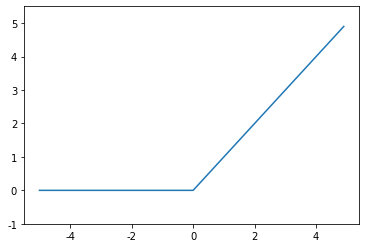

In [17]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x) #maximum함수는 입력된 두 수중 더 큰 수를 출력하는 함수 

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

Relu의 특징

* 0 이상인 곳에서는 수렴하는 구간이 없다.

* 단순히 입력값을 그대로 출력으로 내보내기 때문에 시그모이드 함수에 비해 계산 속도가 빠르다.

* sigmoid/tanh에 비해 stochastic gradient descent(SGD)에서 수렴속도가 무려 6배나 빠르다고 한다

하지만, 
ReLU의 문제는 모델이 학습하는 동안 일부 뉴런이 0만을 출력하여 활성화 되지 않는 문제인데, 이러한 문제를 dead ReLU라고 한다. 특히 학습률(learning rate)이 클 경우, 모델의 뉴런이 절반정도가 죽어 있기도(뉴런이 0만 출력) 한다.

가중치가 업데이트 되면서 가중치 합이 음수가 되는 순간 ReLU에 의해 그 이후로는 0만 출력하게 되며, 이때의 그래디언트 값이 0이 되기 때문이다.


 ReLU Family
 
 LeakyReLU & PReLU(Parametric ReLU) &ELU (Exponential Linear Unit)
 
* 일반적으로 ELU → LeakyReLU → ReLU → tanh → sigmoid 순으로 사용한다고 한다. cs231n 강의에서는 ReLU를 먼저 쓰고 , 그다음으로 LeakyReLU나 ELU 같은 ReLU Family를 쓰며, sigmoid는 사용하지 말라고 하고 있다.  (출처: https://excelsior-cjh.tistory.com/177 [EXCELSIOR])

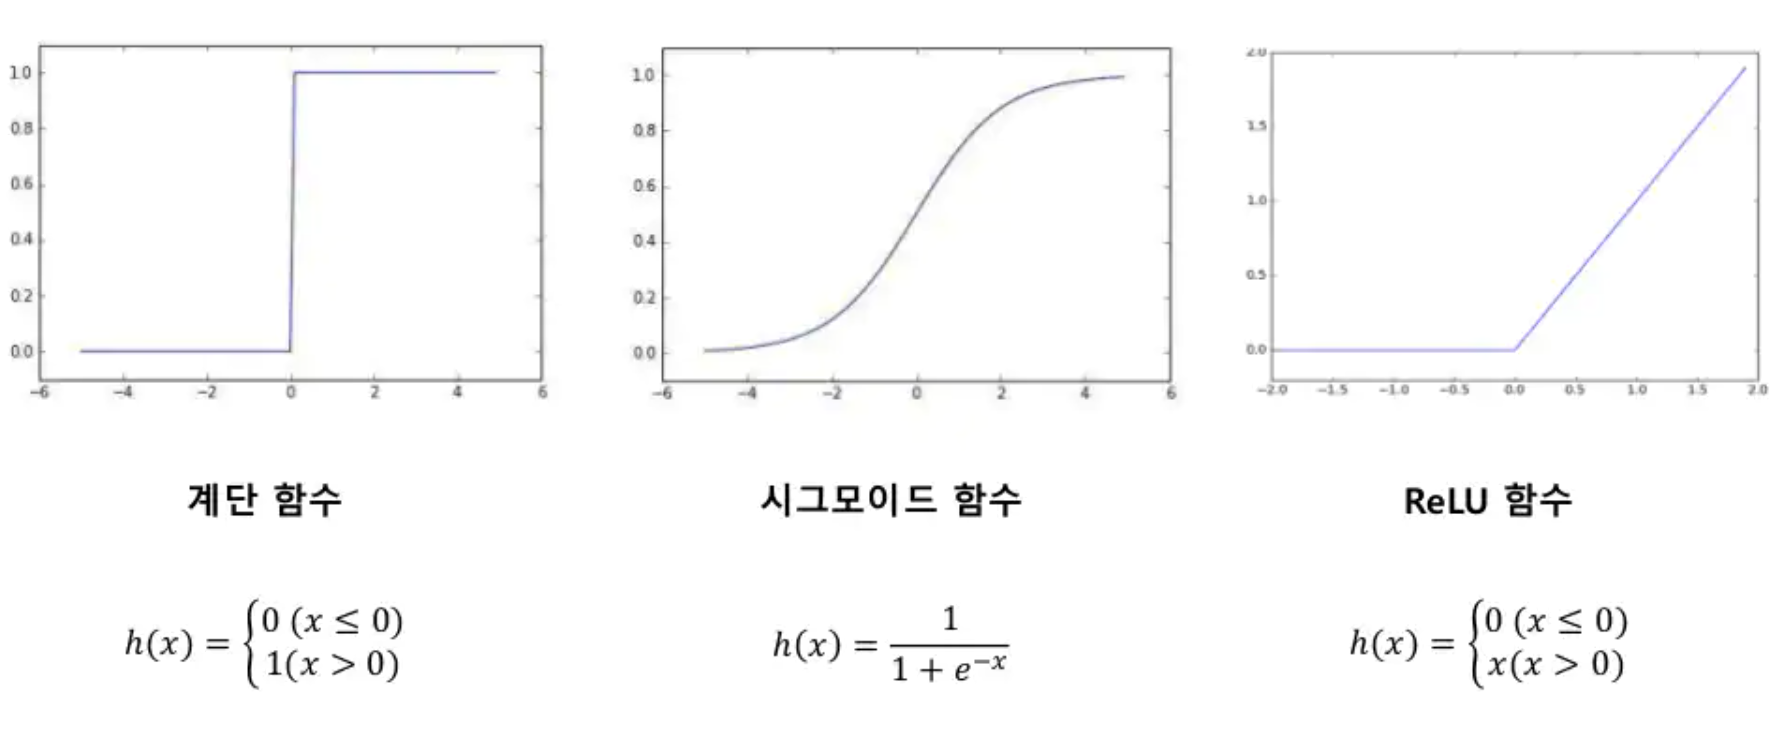

In [37]:
from IPython.display import Image, display
display(Image(filename='img/1_3_6.png', embed=True))

## 3-3 . 다차원 배열의 계산

In [19]:
#1차원 예시
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [20]:
#2차원 예시
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [21]:
#행렬 내적
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

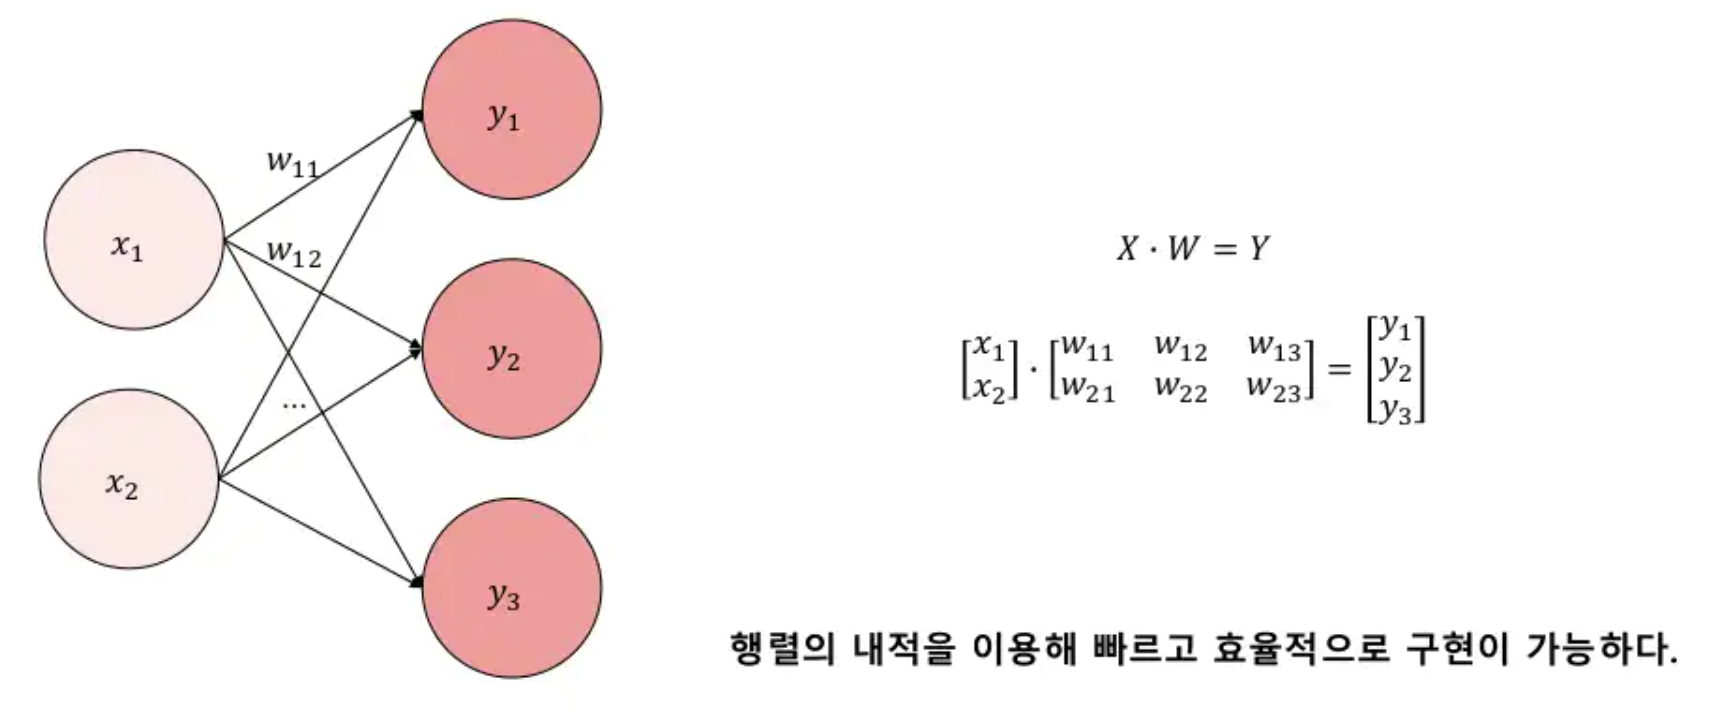

In [22]:
display(Image(filename='img/1_3_7.png', embed=True))

In [23]:
#그림 3-18
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(B.shape)  # (2, 3)
print(X.shape)  # (2,)

A1 = np.dot(X, W1) + B1

(2, 3)
(2, 2)
(2,)


In [24]:
Z1 = sigmoid(A1)

print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [25]:
#은닉1층에서 은닉2층으로 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [26]:
#은닉2층에서 출력층으로 신호 전달
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

#### 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함.

* 일반적으로 이용되는 출력층의 활성화 함수
* 회귀 문제 : 항등 함수
* 이진 분류 문제 : 시그모이드 함수
* 다중 분류 문제 : 소프트맥스 함수


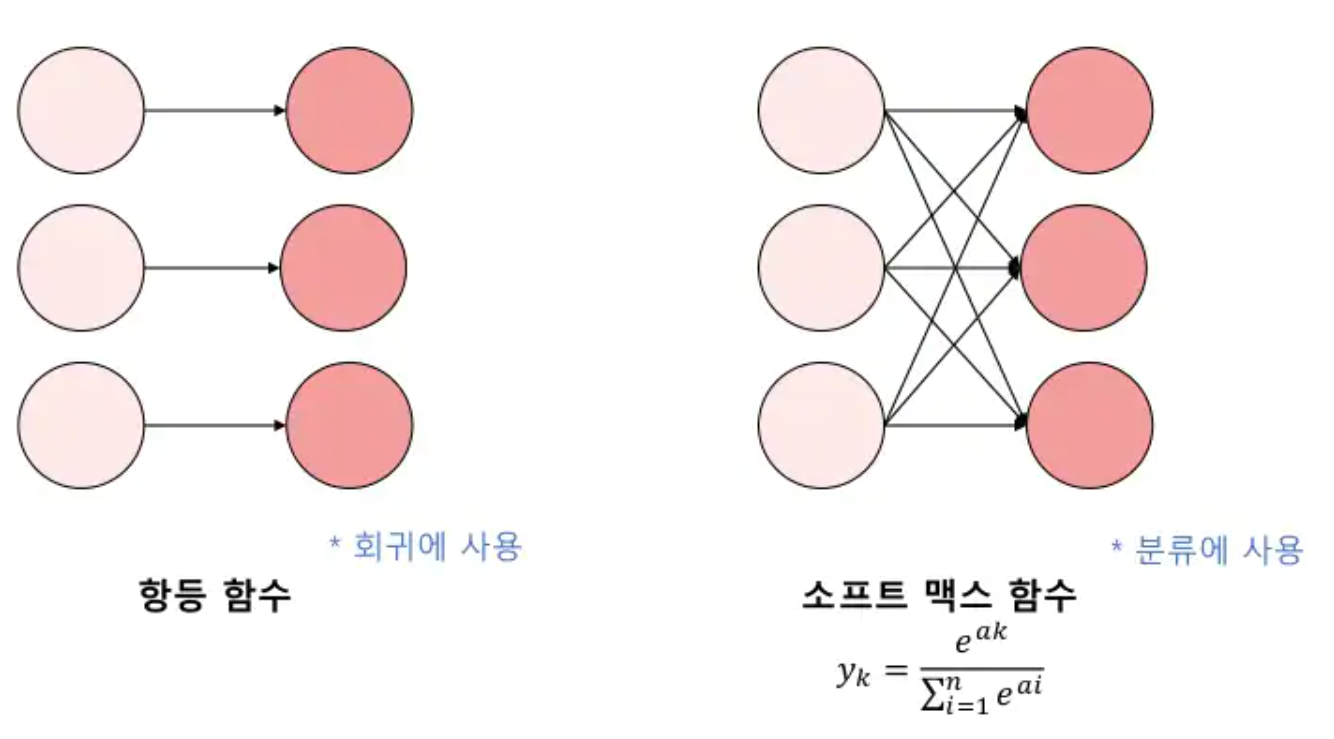

In [27]:
display(Image(filename='img/1_3_8.png', embed=True))

### 소프트 맥스

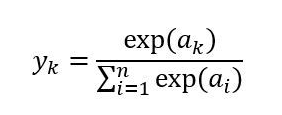

In [38]:
display(Image(filename='img/1_3_9.png', embed=True))


exp(x)는 지수함수(exponential function)

n은 출력층의 뉴런수. yk는 그중 k번째 출력임을 뜻함.

소프트맥스의 분자는 입력 신호 ak의 지수 함수.

분모는 모든 입력신호의 지수 함수의 합으로 구성.

소프트 맥스의 출력은 모든 입력 신호로부터 화살표를 받음.

In [33]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
#소프트맥스 함수 
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

컴퓨터로 소프트맥스를 계산할 때 오버플로 문제 발생가능

오버플로(Overflow) : 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없음

소프트맥스 함수 개선한 수식

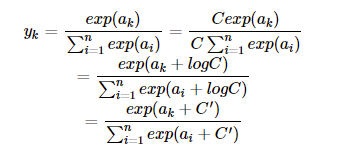

In [39]:
display(Image(filename='img/1_3_10.png', embed=True))

In [47]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산

<ipython-input-47-dcca5baf3a27>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산
<ipython-input-47-dcca5baf3a27>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산


array([nan, nan, nan])

In [ ]:
c = np.max(a)
a - c

In [ ]:
np.exp(a - c) / np.sum(np.exp(a - c))

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

#소프트맥스 함수 출력의 총합은 1. 출력을 '확률'로 해석할 수 있음.

In [28]:
#신경망 구현 : 넘파이의 다차원 배열을 사용하여 신경망의 순방향 처리

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


## 3.6 손글씨 숫자 인식

In [29]:
#import sys, os
#sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax



In [50]:

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

#교재에서 def forward
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    #print(type(y))
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [51]:
print(network)

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

5
(784,)
(28, 28)


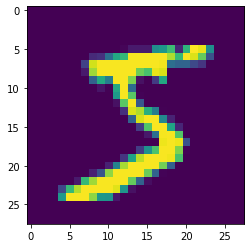

In [31]:
%matplotlib inline
#import sys, os
#sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show()
    plt.imshow(np.array(pil_img))
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]

print(label) # 5

print(img.shape)          # (784,)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)          # (28, 28)

img_show(img)

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


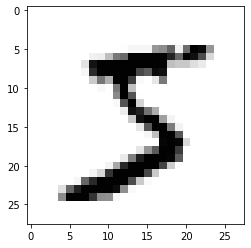

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [32]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

#print(X_train[0])

# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

## 3.6.2 신경망의 추론 처리¶
입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성

첫 번째 은닉층은 50개의 뉴런, 두 번째 은닉층은 100개의 뉴런을 배치

In [ ]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [41]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻음
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 3.6.3 배치 처리


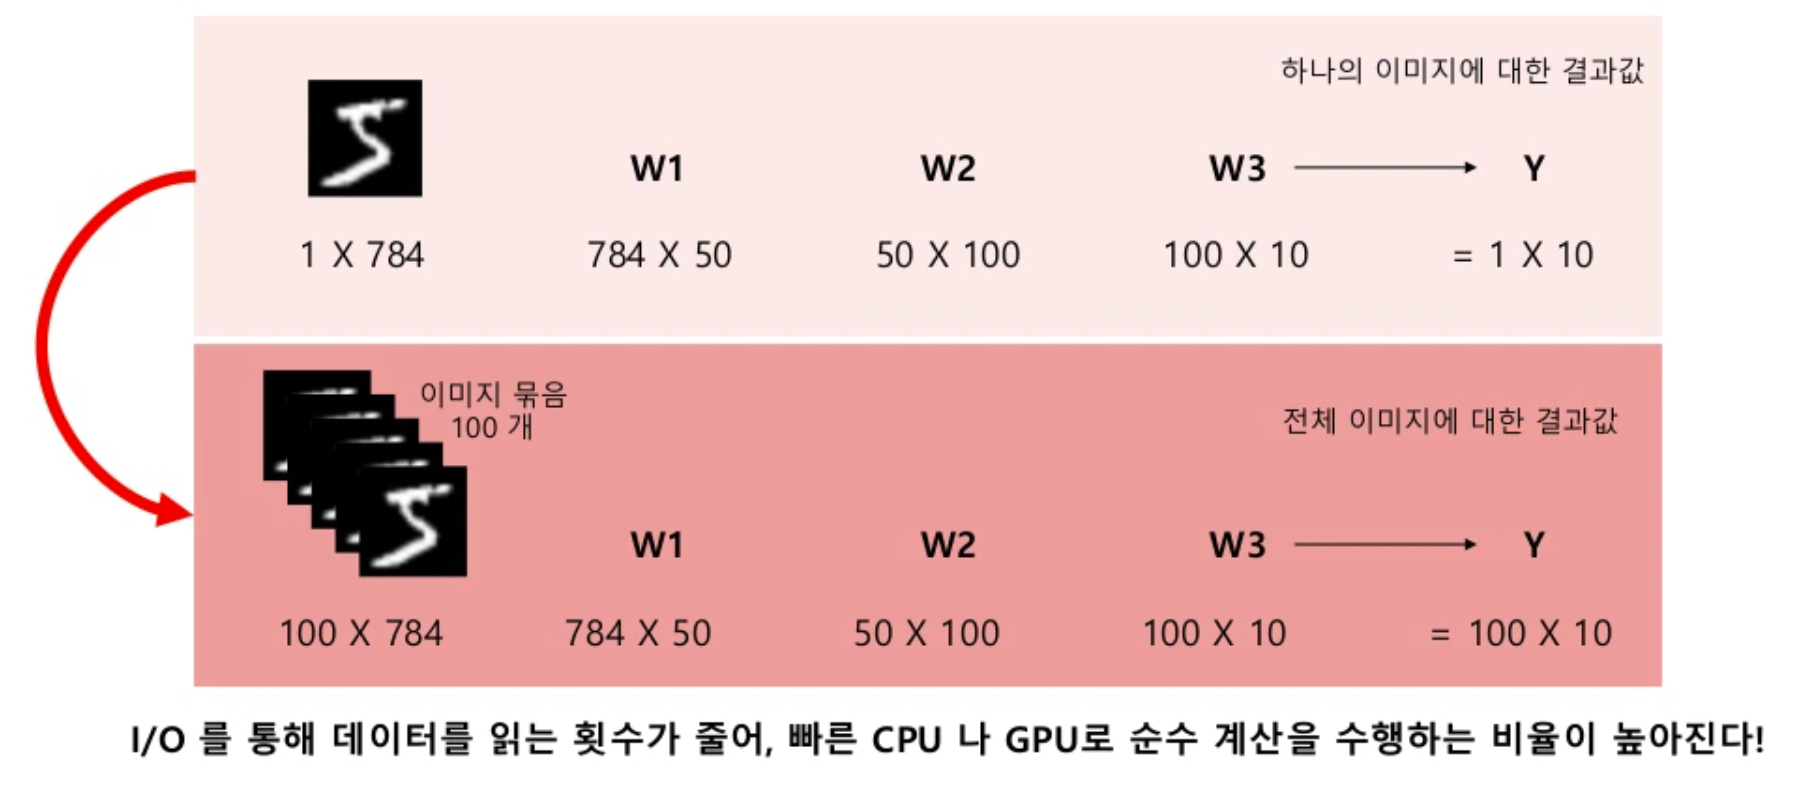

In [43]:
display(Image(filename='img/1_3_11.png', embed=True))

In [42]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [ ]:
x[0].shape

In [ ]:
W1.shape

In [ ]:
W2.shape

In [ ]:
W3.shape

100장 분량 입력 데이터의 결과가 한 번에 출력됨

배치: 하나로 묶은 데이터

배치처리 이점 : 이미지 1장당 처리 시간을 대폭 줄임

수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 계싼

버스에 주는 부하를 줄임. (CPU, GPU로 순수 계산을 수행하는 비율이 높아짐)


In [44]:
# 배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [45]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
y

array([1, 2, 1, 0], dtype=int64)

배치 단위로 분류된 결과를 실제 답과 비교. == 연산자 사용

넘파이 배열끼리 비교하여 True/False로 구성된 bool 배열을 만들고 True가 몇 개인지 셈.

True 개수 세는 예제

In [46]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3

## 3.7 정리
신경망의 순전파를 살펴봄

신경망에서는 매끄럽게 변화하는 시그모이드 함수를, 퍼셉트론에서는 갑자기 변화하는 계단함수를 활성화 함수로 사용

이 차이가 중요함. 다음 장에서 설명

이번 장에서 배운 내용

신경망에서는 활성화 함수로 시그모이드, ReLU 함수 같은 매끄럽게 변화하는 함수를 이용

넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현 가능

기계학습 문제는 크게 회귀, 분류로 나눌 수 있음

출력층의 활성화 함수로 회귀에서는 주로 항등 함수, 분류에서는 주로 소프트맥스 함수를 이용

분류에서는 출력층의 뉴런 수로 분류하는 클래스 수와 같게 설정

입력 데이터를 묶은 것을 배치. 추론 처리를 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있음.